In [1]:
import keras
import pandas as pd
keras.__version__

'2.4.3'

# 영화 리뷰 분류: 이진 분류 예제

이 노트북은 [케라스 창시자에게 배우는 딥러닝](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/) 책의 3장 4절의 코드 예제입니다. 책에는 더 많은 내용과 그림이 있습니다. 이 노트북에는 소스 코드에 관련된 설명만 포함합니다.

----

2종 분류 또는 이진 분류는 아마도 가장 널리 적용된 머신 러닝 문제일 것입니다. 이 예제에서 리뷰 텍스트를 기반으로 영화 리뷰를 긍정과 부정로 분류하는 법을 배우겠습니다.

## IMDB 데이터셋

인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용하겠습니다. 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있습니다.

왜 훈련 데이터와 테스트 데이터를 나눌까요? 같은 데이터에서 머신 러닝 모델을 훈련하고 테스트해서는 절대 안 되기 때문입니다! 모델이 훈련 데이터에서 잘 작동한다는 것이 처음 만난 데이터에서도 잘 동작한다는 것을 보장하지 않습니다. 중요한 것은 새로운 데이터에 대한 모델의 성능입니다(사실 훈련 데이터의 레이블은 이미 알고 있기 때문에 이를 예측하는 모델은 필요하지 않습니다). 예를 들어 모델이 훈련 샘플과 타깃 사이의 매핑을 모두 외워버릴 수 있습니다. 이런 모델은 처음 만나는 데이터에서 타깃을 예측하는 작업에는 쓸모가 없습니다. 다음 장에서 이에 대해 더 자세히 살펴보겠습니다.

MNIST 데이터셋처럼 IMDB 데이터셋도 케라스에 포함되어 있습니다. 이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있습니다. 여기서 각 숫자는 사전에 있는 고유한 단어를 나타냅니다.

다음 코드는 데이터셋을 로드합니다(처음 실행하면 17MB 정도의 데이터가 컴퓨터에 다운로드됩니다):

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/ryleyun/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/ryleyun/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes)

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

매개변수 `num_words=10000`은 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미입니다. 드물게 나타나는 단어는 무시하겠습니다. 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있습니다.

변수 `train_data`와 `test_data`는 리뷰의 목록입니다. 각 리뷰는 단어 인덱스의 리스트입니다(단어 시퀀스가 인코딩된 것입니다). `train_labels`와 `test_labels`는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트입니다:

In [4]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

movie_df = pd.DataFrame(train_data_df)
movie_df.columns=['train_data']
movie_df['train_labels'] = train_labels_df
movie_df

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [5]:
movie_df.shape

(25000, 2)

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    25000 non-null  object
 1   train_labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
movie_df.dtypes

train_data      object
train_labels     int64
dtype: object

In [8]:
movie_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [9]:
movie_df.iloc[:,0]

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [10]:
train_labels[0]

1

가장 자주 등장하는 단어 10,000개로 제한했기 때문에 단어 인덱스는 10,000을 넘지 않습니다:

In [11]:
max([max(sequence) for sequence in train_data])

9999

재미 삼아 이 리뷰 데이터 하나를 원래 영어 단어로 어떻게 바꾸는지 보겠습니다:

In [12]:
for i in train_data[0]:
    print(i)

1
14
22
16
43
530
973
1622
1385
65
458
4468
66
3941
4
173
36
256
5
25
100
43
838
112
50
670
2
9
35
480
284
5
150
4
172
112
167
2
336
385
39
4
172
4536
1111
17
546
38
13
447
4
192
50
16
6
147
2025
19
14
22
4
1920
4613
469
4
22
71
87
12
16
43
530
38
76
15
13
1247
4
22
17
515
17
12
16
626
18
2
5
62
386
12
8
316
8
106
5
4
2223
5244
16
480
66
3785
33
4
130
12
16
38
619
5
25
124
51
36
135
48
25
1415
33
6
22
12
215
28
77
52
5
14
407
16
82
2
8
4
107
117
5952
15
256
4
2
7
3766
5
723
36
71
43
530
476
26
400
317
46
7
4
2
1029
13
104
88
4
381
15
297
98
32
2071
56
26
141
6
194
7486
18
4
226
22
21
134
476
26
480
5
144
30
5535
18
51
36
28
224
92
25
104
4
226
65
16
38
1334
88
12
16
283
5
16
4472
113
103
32
15
16
5345
19
178
32


In [13]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

test = reverse_word_index.get(9999 - 3, '?')
test

'edged'

In [14]:
sorted(reverse_word_index.items())[0:9999]

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


In [15]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [16]:
for x in range(0, 10000):
#    if x == 13 or x == 14:
    print(reverse_word_index.get(x),reverse_word_index.get(x-1), reverse_word_index.get(x-3))

None None None
the None None
and the None
a and None
of a the
to of and
is to a
br is of
in br to
it in is
i it br
this i in
that this it
was that i
as was this
for as that
with for was
movie with as
but movie for
film but with
on film movie
not on but
you not film
are you on
his are not
have his you
he have are
be he his
one be have
all one he
at all be
by at one
an by all
they an at
who they by
so who an
from so they
like from who
her like so
or her from
just or like
about just her
it's about or
out it's just
has out about
if has it's
some if out
there some has
what there if
good what some
more good there
when more what
very when good
up very more
no up when
time no very
she time up
even she no
my even time
would my she
which would even
only which my
story only would
really story which
see really only
their see story
had their really
can had see
were can their
me were had
well me can
than well were
we than me
much we well
been much than
bad been we
get bad much
will get been
do will 

anyway type slow
kid anyway matter
roles kid type
killed roles anyway
heard killed kid
god heard roles
age god killed
says age heard
moment says god
took moment age
leave took says
writer leave moment
strong writer took
cannot strong leave
violence cannot writer
police violence strong
hit police cannot
stop hit violence
happens stop police
particularly happens hit
known particularly stop
involved known happens
happened involved particularly
extremely happened known
daughter extremely involved
obvious daughter happened
told obvious extremely
chance told daughter
living chance obvious
coming living told
lack coming chance
alone lack living
experience alone coming
wouldn't experience lack
including wouldn't alone
murder including experience
attempt murder wouldn't
s attempt including
please s murder
james please attempt
happen james s
wonder happen please
crap wonder james
ago crap happen
brother ago wonder
film's brother crap
gore film's ago
none gore brother
complete none film's
interes

wasted office pure
ended wasted crew
produced ended office
gun produced wasted
filmmakers gun ended
large filmmakers produced
caught large gun
revenge caught filmmakers
filled revenge large
pace filled caught
popular pace revenge
waiting popular filled
'the waiting pace
members 'the popular
science members waiting
decides science 'the
considering decides members
hold considering science
public hold decides
cartoon public considering
party cartoon hold
tension party public
created tension cartoon
slightly created party
uses slightly tension
convincing uses created
compared convincing slightly
la compared uses
familiar la convincing
neither familiar compared
mary neither la
spent mary familiar
sees spent neither
6 sees mary
suddenly 6 spent
30 suddenly sees
intelligent 30 6
escape intelligent suddenly
scott escape 30
fear scott intelligent
water fear escape
brothers water scott
d brothers fear
clever d water
entirely clever brothers
kills entirely d
choice kills clever
bored choice entir

pop witch theatre
suicide pop comedic
dying suicide witch
powers dying pop
filmmaker powers suicide
independent filmmaker dying
introduced independent powers
nightmare introduced filmmaker
extra nightmare independent
engaging extra introduced
actions engaging nightmare
character's actions extra
superior character's engaging
unusual superior actions
arts unusual character's
apparent arts superior
suit apparent unusual
religious suit arts
heroes religious apparent
danny heroes suit
remarkable danny religious
artist remarkable heroes
allow artist danny
pleasure allow remarkable
continue pleasure artist
unnecessary continue allow
x unnecessary pleasure
ring x continue
returns ring unnecessary
physical returns x
sky physical ring
teacher sky returns
pre teacher physical
mental pre sky
watchable mental teacher
provide watchable pre
absurd provide mental
tim absurd watchable
memory tim provide
grand memory absurd
technical grand tim
normally technical memory
wedding normally grand
desire wedd

lynch chosen center
product lynch president
combination product chosen
send combination lynch
fly send product
seat fly combination
sell seat send
70s sell fly
irritating 70s seat
exploitation irritating sell
excited exploitation 70s
stopped excited irritating
hearing stopped exploitation
rescue hearing excited
fill rescue stopped
howard fill hearing
portrays howard rescue
gordon portrays fill
assume gordon howard
parker assume portrays
classics parker gordon
pity classics assume
0 pity parker
produce 0 classics
hunter produce pity
breaking hunter 0
dry breaking produce
fame dry hunter
anna fame breaking
generation anna dry
sheriff generation fame
capable sheriff anna
believes capable generation
handsome believes sheriff
theatrical handsome capable
asking theatrical believes
sports asking handsome
largely sports theatrical
choose largely asking
theaters choose sports
sympathetic theaters largely
extras sympathetic choose
proper extras theaters
ruined proper sympathetic
cares ruined ext

slapstick flashback ludicrous
sleeping slapstick beloved
17 sleeping flashback
dude 17 slapstick
cell dude sleeping
musicals cell 17
fourth musicals dude
wing fourth cell
intellectual wing musicals
beast intellectual fourth
sounded beast wing
settings sounded intellectual
environment settings beast
suck environment sounded
critical suck settings
drinking critical environment
nazi drinking suck
reminiscent nazi critical
brad reminiscent drinking
calling brad nazi
lugosi calling reminiscent
dragon lugosi brad
description dragon calling
susan description lugosi
prefer susan dragon
amazingly prefer description
task amazingly susan
mildly task prefer
pacino mildly amazingly
disbelief pacino task
encounter disbelief mildly
regarding encounter pacino
larry regarding disbelief
inept larry encounter
greater inept regarding
learning greater larry
arms learning inept
dennis arms greater
extraordinary dennis learning
turkey extraordinary arms
storytelling turkey dennis
funnier storytelling extraor

woman's stretch bettie
saves woman's assistant
colorful saves stretch
annoyed colorful woman's
larger annoyed saves
attraction larger colorful
condition attraction annoyed
miscast condition larger
chases miscast attraction
brooks chases condition
virgin brooks miscast
spots virgin chases
basement spots brooks
host basement virgin
dialogs host spots
shoots dialogs basement
gain shoots host
horses gain dialogs
guilt horses shoots
protagonists guilt gain
oil protagonists horses
terrifying oil guilt
month terrifying protagonists
cousin month oil
neighborhood cousin terrifying
vincent neighborhood month
pg vincent cousin
belongs pg neighborhood
stealing belongs vincent
16 stealing pg
nelson 16 belongs
worry nelson stealing
burning worry 16
concert burning nelson
ad concert worry
zone ad burning
strip zone concert
appearing strip ad
worlds appearing zone
object worlds strip
split object appearing
repeat split worlds
hang repeat object
boredom hang split
destruction boredom repeat
thirty dest

failing mitchell elderly
sole failing reasonably
obscure sole mitchell
drunken obscure failing
minimal drunken sole
temple minimal obscure
progress temple drunken
fancy progress minimal
captivating fancy temple
repeatedly captivating progress
wes repeatedly fancy
tunes wes captivating
shoes tunes repeatedly
grandmother shoes wes
cia grandmother tunes
nurse cia shoes
marks nurse grandmother
notably marks cia
emily notably nurse
soviet emily marks
shirt soviet notably
explore shirt emily
smoke explore soviet
souls smoke shirt
pushing souls explore
argument pushing smoke
distance argument souls
warrior distance pushing
outcome warrior argument
reduced outcome distance
loosely reduced warrior
scientific loosely outcome
goldberg scientific reduced
gradually goldberg loosely
bleak gradually scientific
timothy bleak goldberg
manhattan timothy gradually
idiots manhattan bleak
restaurant idiots timothy
scripted restaurant manhattan
misses scripted idiots
explicit misses restaurant
providing exp

advance enemies backgrounds
bull advance planned
authority bull enemies
crush authority advance
outfit crush bull
emphasis outfit authority
method emphasis crush
terrorist method outfit
senseless terrorist emphasis
pig senseless method
uwe pig terrorist
simplistic uwe senseless
benefit simplistic pig
adorable benefit uwe
eighties adorable simplistic
ruthless eighties benefit
godzilla ruthless adorable
blew godzilla eighties
countryside blew ruthless
specifically countryside godzilla
wont specifically blew
performer wont countryside
hbo performer specifically
traveling hbo wont
todd traveling performer
practice todd hbo
diane practice traveling
fix diane todd
faster fix practice
1980 faster diane
commented 1980 fix
sh commented faster
loyal sh 1980
saga loyal commented
ties saga sh
disappear ties loyal
awe disappear saga
earned awe ties
buff earned disappear
rick buff awe
loads rick earned
link loads buff
angeles link rick
corruption angeles loads
forms corruption link
menace forms ange

mundane polanski der
specially mundane photo
mighty specially polanski
homer mighty mundane
ear homer specially
masterpieces ear mighty
generated masterpieces homer
leo generated ear
improvement leo masterpieces
poem improvement generated
ham poem leo
cliche ham improvement
marty cliche poem
caliber marty ham
mentions caliber cliche
minimum mentions marty
showdown minimum caliber
borrowed showdown mentions
elm borrowed minimum
icon elm showdown
brenda icon borrowed
polished brenda elm
1984 polished icon
mechanical 1984 brenda
overlook mechanical polished
loaded overlook 1984
map loaded mechanical
recording map overlook
craven recording loaded
tiger craven map
roth tiger recording
awfully roth craven
suffice awfully tiger
troubles suffice roth
introduce troubles awfully
equipment introduce suffice
ashley equipment troubles
wendy ashley introduce
pamela wendy equipment
empathy pamela ashley
phantom empathy wendy
betty phantom pamela
resident betty empathy
unreal resident phantom
ruins un

19 actor's indication
fist 19 bunny
mayhem fist actor's
1969 mayhem 19
policeman 1969 fist
cannon policeman mayhem
thread cannon 1969
basinger thread policeman
bridget basinger cannon
selection bridget thread
palma selection basinger
inconsistent palma bridget
saint inconsistent selection
stopping saint palma
gut stopping inconsistent
burst gut saint
visions burst stopping
angst visions gut
daughter's angst burst
beside daughter's visions
reader beside angst
sentinel reader daughter's
nails sentinel beside
promote nails reader
weaknesses promote sentinel
heading weaknesses nails
www heading promote
venture www weaknesses
malone venture heading
misguided malone www
1960's misguided venture
muppet 1960's malone
uh muppet misguided
drove uh 1960's
overlong drove muppet
gal overlong uh
cope gal drove
mccoy cope overlong
threatens mccoy gal
iconic threatens cope
rita iconic mccoy
stages rita threatens
underworld stages iconic
adolescent underworld rita
tip adolescent stages
previews tip und

nations motive swallow
convicted nations standout
bravo convicted motive
youtube bravo nations
nolte youtube convicted
lauren nolte bravo
holocaust lauren youtube
vehicles holocaust nolte
bones vehicles lauren
thirties bones holocaust
audition thirties vehicles
factors audition bones
headache factors thirties
growth headache audition
natured growth factors
mason natured headache
expertly mason growth
spine expertly natured
hires spine mason
zizek hires expertly
undeniably zizek spine
bates undeniably hires
excellently bates zizek
highway excellently undeniably
nina highway bates
screenwriters nina excellently
buzz screenwriters highway
chronicles buzz nina
insults chronicles screenwriters
corn insults buzz
stunningly corn chronicles
dread stunningly insults
homosexuality dread corn
perception homosexuality stunningly
antonio perception dread
lukas antonio homosexuality
reward lukas perception
decline reward antonio
son's decline lukas
las son's reward
mol las decline
unsuspecting mol s

thunderbirds achieves ritual
scored thunderbirds mormon
vanity scored achieves
pad vanity thunderbirds
aussie pad scored
explodes aussie vanity
ira explodes pad
dynamics ira aussie
preminger dynamics explodes
franklin preminger ira
verbal franklin dynamics
feminine verbal preminger
policy feminine franklin
flavor policy verbal
expense flavor feminine
suggesting expense policy
trains suggesting flavor
instincts trains expense
nuances instincts suggesting
dumber nuances trains
flock dumber instincts
feeble flock nuances
deanna feeble dumber
hoot deanna flock
cuban hoot feeble
kathy cuban deanna
possession kathy hoot
document possession cuban
cohen document kathy
foundation cohen possession
diary foundation document
guinea diary cohen
covering guinea foundation
vomit covering diary
readily vomit guinea
fluid readily covering
cigarette fluid vomit
tactics cigarette readily
deliciously tactics fluid
seductive deliciously cigarette
circles seductive tactics
phase circles deliciously
themed p

duh silverman announced
sonny duh assure
1958 sonny silverman
blockbusters 1958 duh
pornography blockbusters sonny
vivian pornography 1958
sensibility vivian blockbusters
courtesy sensibility pornography
battlestar courtesy vivian
macdonald battlestar sensibility
boots macdonald courtesy
brides boots battlestar
reunite brides macdonald
brooke reunite boots
controls brooke brides
masked controls reunite
phantasm masked brooke
prophecy phantasm controls
slower prophecy masked
relying slower phantasm
sweat relying prophecy
divided sweat slower
mannered divided relying
marked mannered sweat
witnessing marked divided
girlfriends witnessing mannered
snipes girlfriends marked
fortunate snipes witnessing
watcher fortunate girlfriends
brett watcher snipes
ernie brett fortunate
villainous ernie watcher
strung villainous brett
rebels strung ernie
candle rebels villainous
counting candle strung
mccarthy counting rebels
rodriguez mccarthy candle
bonham rodriguez counting
portuguese bonham mccarthy


conveying reported mediocrity
programming conveying influences
stoned programming reported
val stoned conveying
barnes val programming
sharks barnes stoned
unravel sharks val
courageous unravel barnes
deck courageous sharks
giovanna deck unravel
grating giovanna courageous
britney grating deck
distinctive britney giovanna
blondell distinctive grating
spoofs blondell britney
brush spoofs distinctive
effortlessly brush blondell
riders effortlessly spoofs
midget riders brush
annoyance midget effortlessly
counterparts annoyance riders
economy counterparts midget
rivalry economy annoyance
stab rivalry counterparts
knights stab economy
socially knights rivalry
symbols socially stab
bodyguard symbols knights
qualifies bodyguard socially
connie qualifies symbols
acclaim connie bodyguard
managing acclaim qualifies
vibe managing connie
monroe vibe acclaim
frat monroe managing
baked frat vibe
combining baked monroe
martians combining frat
boobs martians baked
prostitution boobs combining
closure 

operating witted thirds
atomic operating billion
lt atomic witted
supportive lt operating
henderson supportive atomic
profit henderson lt
prolific profit supportive
sore prolific henderson
virginity sore profit
sleepy virginity prolific
golf sleepy sore
outlaw golf virginity
unnerving outlaw sleepy
expresses unnerving golf
mills expresses outlaw
forsythe mills unnerving
authors forsythe expresses
behaving authors mills
visconti behaving forsythe
efficient visconti authors
visceral efficient behaving
glow visceral visconti
jones' glow efficient
melinda jones' visceral
muscle melinda glow
pepper muscle jones'
heavenly pepper melinda
unwilling heavenly muscle
1965 unwilling pepper
roach 1965 heavenly
marcus roach unwilling
tables marcus 1965
shelves tables roach
dunne shelves marcus
tedium dunne tables
illustrated tedium shelves
explanations illustrated dunne
snowy explanations tedium
patriotic snowy illustrated
alcoholism patriotic explanations
whipped alcoholism snowy
ledger whipped pat

streak 1941 daphne
shrink streak misplaced
garnered shrink 1941
breathless garnered streak
hiv breathless shrink
delve hiv garnered
grain delve breathless
spectrum grain hiv
dusty spectrum delve
durbin dusty grain
locks durbin spectrum
november locks dusty
o'neill november durbin
crook o'neill locks
render crook november
participation render o'neill
deception participation crook
replay deception render
apartments replay participation
sr apartments deception
lawyers sr replay
requisite lawyers apartments
telly requisite sr
basil telly lawyers
kinky basil requisite
assist kinky telly
spectacularly assist basil
scantily spectacularly kinky
prevented scantily assist
obscene prevented spectacularly
reincarnation obscene scantily
morgana reincarnation prevented
bout morgana obscene
looney bout reincarnation
adventurous looney morgana
sykes adventurous bout
maverick sykes looney
lucio maverick adventurous
travelling lucio sykes
diabolical travelling maverick
capt diabolical lucio
promotion ca

In [17]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [18]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## 데이터 준비

신경망에 숫자 리스트를 주입할 수는 없습니다. 리스트를 텐서로 바꾸는 두 가지 방법이 있습니다:

* 같은 길이가 되도록 리스트에 패딩을 추가하고 `(samples, sequence_length)` 크기의 정수 텐서로 변환합니다. 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용합니다(`Embedding` 층을 말하며 나중에 자세히 다루겠습니다).
* 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환합니다. 예를 들면 시퀀스 `[3, 5]`를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환합니다. 그다음 부동 소수 벡터 데이터를 다룰 수 있는 `Dense` 층을 신경망의 첫 번째 층으로 사용합니다.

여기서는 두 번째 방식을 사용하고 이해를 돕기 위해 직접 데이터를 원-핫 벡터로 만들겠습니다:

In [19]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    print()
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

이제 샘플은 다음과 같이 나타납니다:

In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

레이블은 쉽게 벡터로 바꿀 수 있습니다:

In [21]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

이제 신경망에 주입할 데이터가 준비되었습니다.

## 신경망 모델 만들기

입력 데이터가 벡터이고 레이블은 스칼라(1 또는 0)입니다. 아마 앞으로 볼 수 있는 문제 중에서 가장 간단할 것입니다. 이런 문제에 잘 작동하는 네트워크 종류는 `relu` 활성화 함수를 사용한 완전 연결 층(즉, `Dense(16, activation='relu')`)을 그냥 쌓은 것입니다.

`Dense` 층에 전달한 매개변수(16)는 은닉 유닛의 개수입니다. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됩니다. 2장에서 `relu` 활성화 함수를 사용한 `Dense` 층을 다음과 같은 텐서 연산을 연결하여 구현하였습니다:

`output = relu(dot(W, input) + b)`

16개의 은닉 유닛이 있다는 것은 가중치 행렬 `W`의 크기가 `(input_dimension, 16)`이라는 뜻입니다. 입력 데이터와 `W`를 점곱하면 입력 데이터가 16 차원으로 표현된 공간으로 투영됩니다(그리고 편향 벡터 `b`를 더하고 `relu` 연산을 적용합니다). 표현 공간의 차원을 '신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'로 이해할 수 있습니다. 은닉 유닛을 늘리면 (표현 공간을 더 고차원으로 만들면) 신경망이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원치 않은 패턴을 학습할 수도 있습니다(훈련 데이터에서는 성능이 향상되지만 테스트 데이터에서는 그렇지 않은 패턴입니다).

`Dense` 층을 쌓을 때 두 가진 중요한 구조상의 결정이 필요합니다:

* 얼마나 많은 층을 사용할 것인가
* 각 층에 얼마나 많은 은닉 유닛을 둘 것인가

4장에서 이런 결정을 하는 데 도움이 되는 일반적인 원리를 배우겠습니다. 당분간은 저를 믿고 선택한 다음 구조를 따라 주세요.

* 16개의 은닉 유닛을 가진 두 개의 은닉층
* 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

중간에 있는 은닉층은 활성화 함수로 `relu`를 사용하고 마지막 층은 확률(0과 1 사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미합니다)을 출력하기 위해 시그모이드 활성화 함수를 사용합니다. `relu`는 음수를 0으로 만드는 함수입니다. 시그모이드는 임의의 값을 [0, 1] 사이로 압축하므로 출력 값을 확률처럼 해석할 수 있습니다.

다음이 이 신경망의 모습입니다:

![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

다음은 이 신경망의 케라스 구현입니다. 이전에 보았던 MNIST 예제와 비슷합니다:

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

마지막으로 손실 함수와 옵티마이저를 선택해야 합니다. 이진 분류 문제이고 신경망의 출력이 확률이기 때문에(네트워크의 끝에 시그모이드 활성화 함수를 사용한 하나의 유닛으로 된 층을 놓았습니다), `binary_crossentropy` 손실이 적합합니다. 이 함수가 유일한 선택은 아니고 예를 들어 `mean_squared_error`를 사용할 수도 있습니다. 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택입니다. 크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정합니다. 여기에서는 원본 분포와 예측 분포 사이를 측정합니다.

다음은 `rmsprop` 옵티마이저와 `binary_crossentropy` 손실 함수로 모델을 설정하는 단계입니다. 훈련하는 동안 정확도를 사용해 모니터링하겠습니다.

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

케라스에 `rmsprop`, `binary_crossentropy`, `accuracy`가 포함되어 있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능합니다. 이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있습니다. 전자의 경우에는 옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어 `optimizer` 매개변수에 전달하면 됩니다:

In [24]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

후자의 경우는 `loss`와 `metrics` 매개변수에 함수 객체를 전달하면 됩니다:

In [25]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 훈련 검증

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어서 검증 세트를 만들어야 합니다:

In [27]:
x_val = x_train[:10000].astype(float)
partial_x_train = x_train[10000:].astype(float)

y_val = y_train[:10000].astype(float)
partial_y_train = y_train[10000:].astype(float)

이제 모델을 512개 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킵니다(`x_train`과 `y_train` 텐서에 있는 모든 샘플에 대해 20번 반복합니다). 동시에 따로 떼어 놓은 10,000개의 샘플에서 손실과 정확도를 측정할 것입니다. 이렇게 하려면 `validation_data` 매개변수에 검증 데이터를 전달해야 합니다:

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 109ms/step - loss: 0.5820 - accuracy: 0.7178 - val_loss: 0.3875 - val_accuracy: 0.8624
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3165 - accuracy: 0.9028 - val_loss: 0.3030 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2186 - accuracy: 0.9316 - val_loss: 0.2753 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1707 - accuracy: 0.9473 - val_loss: 0.3328 - val_accuracy: 0.8662
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1439 - accuracy: 0.9534 - val_loss: 0.2787 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1151 - accuracy: 0.9674 - val_loss: 0.3049 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0926 - accuracy: 0.9727 - val_loss: 0.3325 - val_accuracy: 0.8810
Epoch 8/20
3

CPU를 사용해도 에포크마다 2초가 걸리지 않습니다. 전체 훈련은 20초 이상 걸립니다. 에포크가 끝날 때마다 10,000개의 검증 샘플 데이터에서 손실과 정확도를 계산하기 때문에 약간씩 지연됩니다.

`model.fit()` 메서드는 `History` 객체를 반환합니다. 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 `history` 속성을 가지고 있습니다. 한 번 확인해 보죠:

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

이 딕셔너리는 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 네 개의 항목을 담고 있습니다. 맷플롯립을 사용해 훈련과 검증 데이터에 대한 손실과 정확도를 그려 보겠습니다:

In [30]:
import matplotlib.pyplot as plt

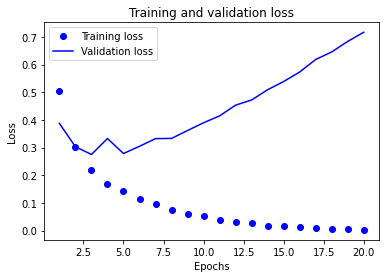

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

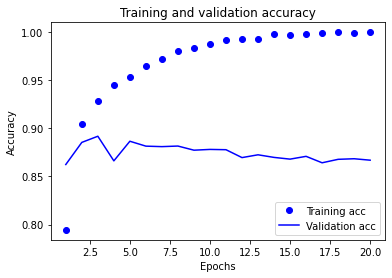

In [33]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

점선은 훈련 손실과 정확도이고 실선은 검증 손실과 정확도입니다. 신경망의 무작위한 초기화 때문에 사람마다 결과거 조금 다를 수 있습니다.

여기에서 볼 수 있듯이 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가합니다. 경사 하강법 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로입니다. 검증 손실과 정확도는 이와 같지 않습니다. 4번째 에포크에서 그래프가 역전되는 것 같습니다. 이것이 훈련 세트에서 잘 작동하는 모델이 처음 보는 데이터에 잘 작동하지 않을 수 있다고 앞서 언급한 경고의 한 사례입니다. 정확한 용어로 말하면 과대적합되었다고 합니다. 2번째 에포크 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 훈련 세트 이외의 데이터에는 일반화되지 못합니다.

이런 경우에 과대적합을 방지하기 위해서 3번째 에포크 이후에 훈련을 중지할 수 있습니다. 일반적으로 4장에서 보게 될 과대적합을 완화하는 다양한 종류의 기술을 사용할 수 있습니다.

처음부터 다시 새로운 신경망을 4번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해 보겠습니다:

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.5514 - accuracy: 0.7483
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2771 - accuracy: 0.9087
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2105 - accuracy: 0.9264
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2921 - accuracy: 0.8836


In [35]:
results

[0.2920525372028351, 0.8835999965667725]

아주 단순한 방식으로도 87%의 정확도를 달성했습니다. 최고 수준의 기법을 사용하면 95%에 가까운 성능을 얻을 수 있습니다.

## 훈련된 모델로 새로운 데이터에 대해 예측하기

모델을 훈련시킨 후에 이를 실전 환경에서 사용하고 싶을 것입니다. `predict` 메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있습니다:

In [ ]:
model.predict(x_test)

여기에서처럼 이 모델은 어떤 샘플에 대해 확신을 가지고 있지만(0.99 또는 그 이상, 0.01 또는 그 이하) 어떤 샘플에 대해서는 확신이 부족합니다(0.6, 0.4). 

## 추가 실험

* 여기에서는 두 개의 은닉층을 사용했습니다. 한 개 또는 세 개의 은닉층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해 보세요.
* 층의 은닉 유닛을 추가하거나 줄여 보세요: 32개 유닛, 64개 유닛 등
* `binary_crossentropy` 대신에 `mse` 손실 함수를 사용해 보세요.
* `relu` 대신에 `tanh` 활성화 함수(초창기 신경망에서 인기 있었던 함수입니다)를 사용해 보세요.

다음 실험을 진행하면 여기에서 선택한 구조가 향상의 여지는 있지만 어느 정도 납득할 만한 수준이라는 것을 알게 것입니다!

## 정리

다음은 이 예제에서 배운 것들입니다:

* 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요합니다. 단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식도 있습니다.
* `relu` 활성화 함수와 함께 `Dense` 층을 쌓은 네트워크는 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어서 앞으로 자주 사용하게 될 것입니다.
* (출력 클래스가 두 개인) 이진 분류 문제에서 네트워크는 하나의 유닛과 `sigmoid` 활성화 함수를 가진 `Dense` 층으로 끝나야 합니다. 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값입니다.
* 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 `binary_crossentropy`입니다.
* `rmsprop` 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택입니다. 걱정할 거리가 하나 줄은 셈입니다.
* 훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 됩니다. 항상 훈련 세트 이외의 데이터에서 성능을 모니터링해야 합니다.